In [2]:
file = "/Users/Leonore/Downloads/N - 8(fld 1 wv FITC - FITC).tif"

In [3]:
from skimage.io import imread

In [4]:
img = imread(file)

In [1]:
from plot_helpers import show_image
import matplotlib.pyplot as plt
import numpy as np

from dataset_helpers import get_label

In [16]:
pixels = img

In [2]:
def preprocess(data, labels, mask=False):
    # avoid changing the dataset directly
    data = np.copy(data)

    # initialise arrays for filling in
    x_data = np.ndarray(shape=(len(data) // 2, 192, 192, 3))
    y_data = np.ndarray(shape=(len(data) // 2))

    # initialise index values
    idx = 0
    i = 0

    # loop through images and process
    while idx < (len(data)):
        # ignore 100, 300, etc. values as they will already have been processed
        if (idx % 100 == 0) and (idx % 200 != 0):
            idx += 100
        else:
            # if the image is "faulty" we cannot low_clip and apply minmax -> NaN
            tcell = process(data[idx])
            dcell = process(data[idx + 100])
            y_data[i] = labels[idx]

            idx += 1
            i += 1

            # try and save memory
            tcell = None
            dcell = None

    print('Images preprocessed. Size of dataset: {}'.format(len(x_data)))
    return x_data, y_data


In [3]:
def process(pixels):
    mean, std = pixels.mean(), pixels.std()
    pixels = (pixels - mean) / std
    return np.clip(pixels, -1.0, 1.0)

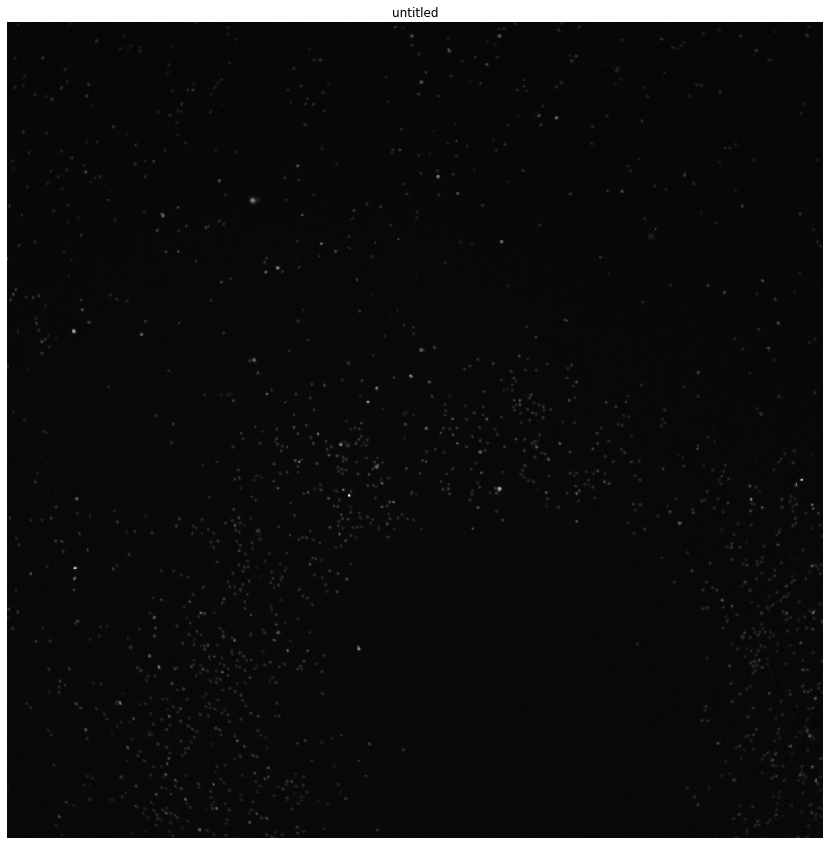

In [27]:
plt.figure(figsize=(15,15))
show_image(img)

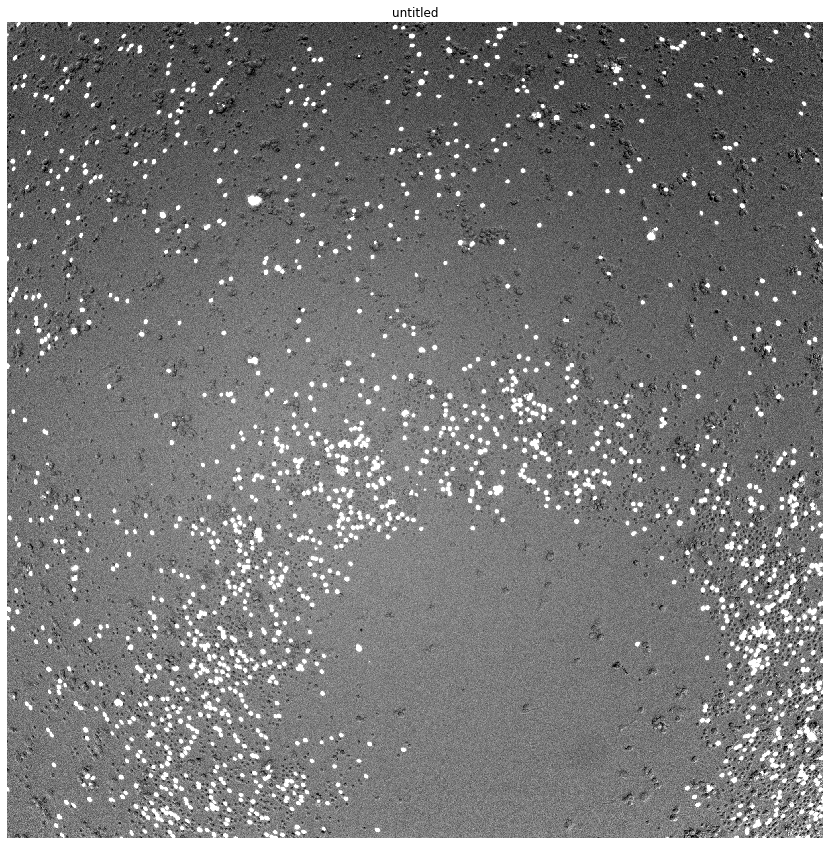

In [19]:
plt.figure(figsize=(15,15))
show_image(pixels)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

In [22]:
image = gaussian_filter(pixels, 1)

In [23]:

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

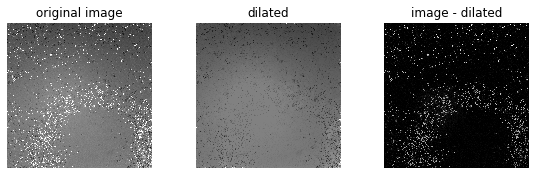

In [24]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

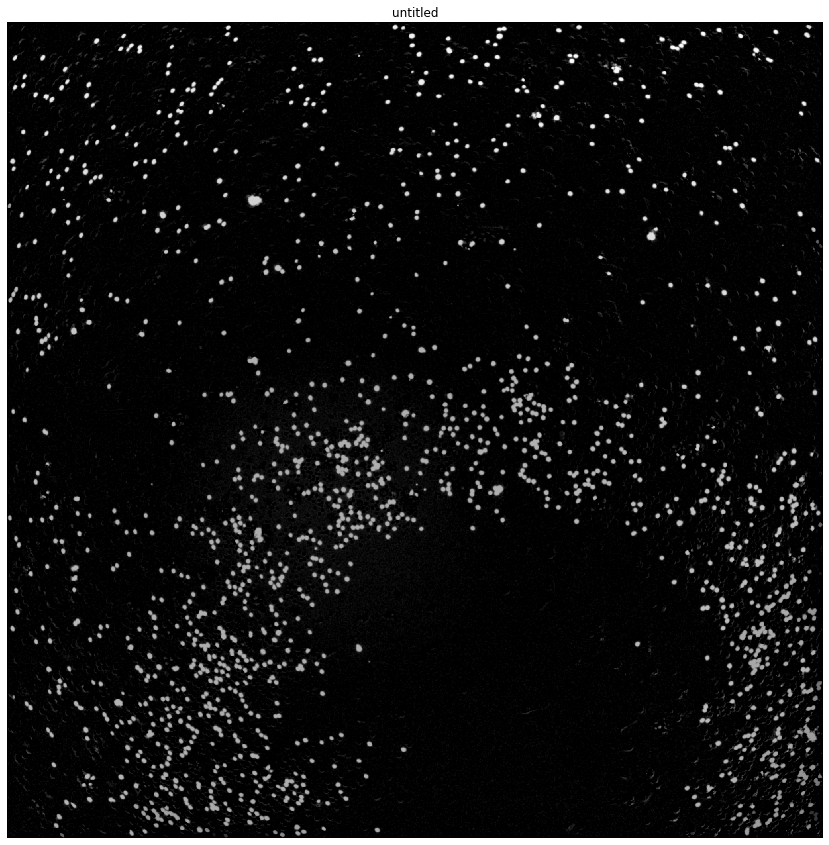

In [26]:
plt.figure(figsize=(15,15))
show_image(image - dilated)

In [4]:
import numpy as np

In [5]:
npzfile = np.load('/Users/Leonore/Desktop/dmso_unmodified.npz')
y = npzfile['y']
y_dmso = np.array([get_label(i) for i in y])
X = npzfile['x']

In [6]:
x_test, y_test = preprocess(X[:10000], y_dmso[:10000])

Images preprocessed. Size of dataset: 5000


In [7]:
from cell_autoencoder import make_autoencoder, evaluate

Using TensorFlow backend.


In [8]:
decoder, encoder = make_autoencoder()

In [9]:
evaluate(decoder, x_test, x_test, epochs=10, batch_size=32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
 128/5000 [..............................] - ETA: 21:06 - loss: 0.0000e+00

KeyboardInterrupt: 